In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap


In [2]:
#veri setini alıyoruz
data = pd.read_csv("decision_tree.csv")
#başlıkları bastırıyoruz
data.head()

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Erkek,19,19000,0
1,15810944,Erkek,35,20000,0
2,15668575,Kadın,26,43000,0
3,15603246,Kadın,27,57000,0
4,15804002,Erkek,19,76000,0


In [3]:
#ilk 4 veri setini ve verinin parametrelerini aldık
X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [4]:
#eğitim ve test veri setlerini oluşturduk
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state= 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [5]:
#kara ağacı fonksiyonumuzu çağıralım
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [6]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to

In [30]:
#doğruluk payımızın ne kadar olduğunu kontrol edelim
y_pred = classifier.predict(X_test)
print('Doğruluk payı', metrics.accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Doğruluk payı 0.89
[[62  6]
 [ 5 27]]


C:\Users\Furkan\AppData\Local\Temp\ipykernel_10032\124731378.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1], c = ListedColormap(("gray","red"))(i),label = j)


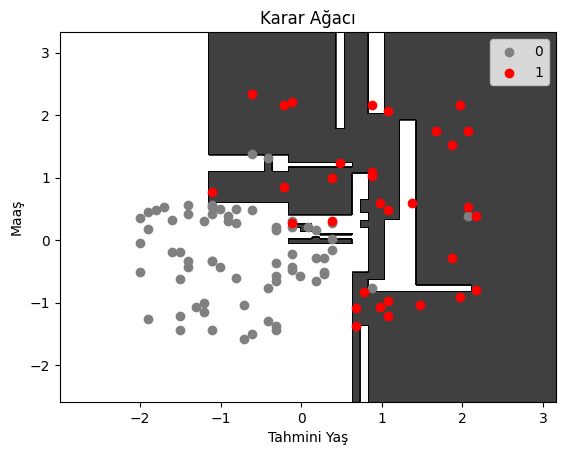

In [31]:
#Veri setlerimiziden oluşturulan modeli görselleştirelim
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop= X_set[:,0].max()+1, step = 0.01),np.arange(start = X_set[:,1].min()-1, stop= X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(("white","black")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1], c = ListedColormap(("gray","red"))(i),label = j)
plt.title("Karar Ağacı")
plt.xlabel("Tahmini Yaş")
plt.ylabel("Maaş")
plt.legend()
plt.show()
